In [1]:
import os
import sys
import csv
import matplotlib.pyplot as plt
import seaborn as sns

repo_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
sys.path.append(repo_root)

from src import *

In [2]:

def get_predicted_ratings(games, pi_values):
    models = [
        'newman', 'newman_leadership', 'higher_order_newman', 
        'higher_order_leadership', 'spring_rank', 'spring_rank_leadership', 
        'page_rank', 'page_rank_leadership', 'point_wise'
    ]
    
    predicted_rankings = {}
    for model in models:
        predictions = get_predictions(model, games, pi_values)
        predicted_rankings[model] = list(predictions.values())

    return predicted_rankings

def get_distributions_luxe_axiom(N, M, K1, K2, leadership=False):

    if leadership:
        data, pi_values = generate_leadership_model_instance(N, M, K1, K2)
    else:
        data, pi_values = generate_model_instance(N, M, K1, K2)

    flipped_games = [game[::-1] for game in data]

    data.extend(flipped_games)

    return get_predicted_ratings(data, pi_values)

def get_distributions(N, M, K1, K2, leadership=False):
    if leadership:
        data, pi_values = generate_leadership_model_instance(N, M, K1, K2)
    else:
        data, pi_values = generate_model_instance(N, M, K1, K2)

    return get_predicted_ratings(data, pi_values)

def plot_distributions(predictions):
    num_models = len(predictions)
    colors = sns.color_palette("husl", num_models)  # Generate a color palette with unique colors

    # Create subplots
    fig, axs = plt.subplots(3, 3, figsize=(18, 12), sharex=False)

    # Plot each distribution independently
    for i, (model, preds) in enumerate(predictions.items()):
        row = i // 3
        col = i % 3
        sns.kdeplot(preds, ax=axs[row, col], fill=True, color=colors[i])
        axs[row, col].set_title(f'Distribution of Predicted Ratings for {model}')
        axs[row, col].set_xlabel('Predicted Rantings')
        axs[row, col].set_ylabel('Density')

    plt.tight_layout()
    plt.show()






# Standard

{'newman': [0.9483423167738453, 0.18094972766235948, 0.1593488288257177, 1.5021605388115598, 2.3452999025457153, 3.498916316323084, 0.16575168092520998, 0.3935162049654139, 1.978937655969513, 2.2241039405723173, 0.7126129747236202, 0.9698908810627397, 0.9999775697832997, 2.5794461218539366, 2.623579682304437, 2.6218705304348084, 0.4320855878892918, 1.4358149837156615, 0.8674303050324368, 0.23876191319884443, 4.8204913831402, 2.4697579788562303, 1.4968938529002316, 3.0849469868113095, 0.6780500049284199, 0.5131723682132615, 1.177792429468423, 0.550089657210893, 0.7110079439658166, 0.23552991343826526, 0.39220546355653924, 0.1382215438708516, 0.7820186205654241, 0.8818365287775817, 2.1327388342610076, 0.4498251352765341, 0.9699026125238546, 0.3057551671757497, 2.8811898861817435, 0.3868728675450631, 0.9221154316487922, 1.432669325661754, 4.484325969661452, 4.27951474155442, 0.8414627335407414, 3.8484645748639474, 0.5535714847759214, 1.4324702517017025, 0.9498920717216089, 1.9799255870316

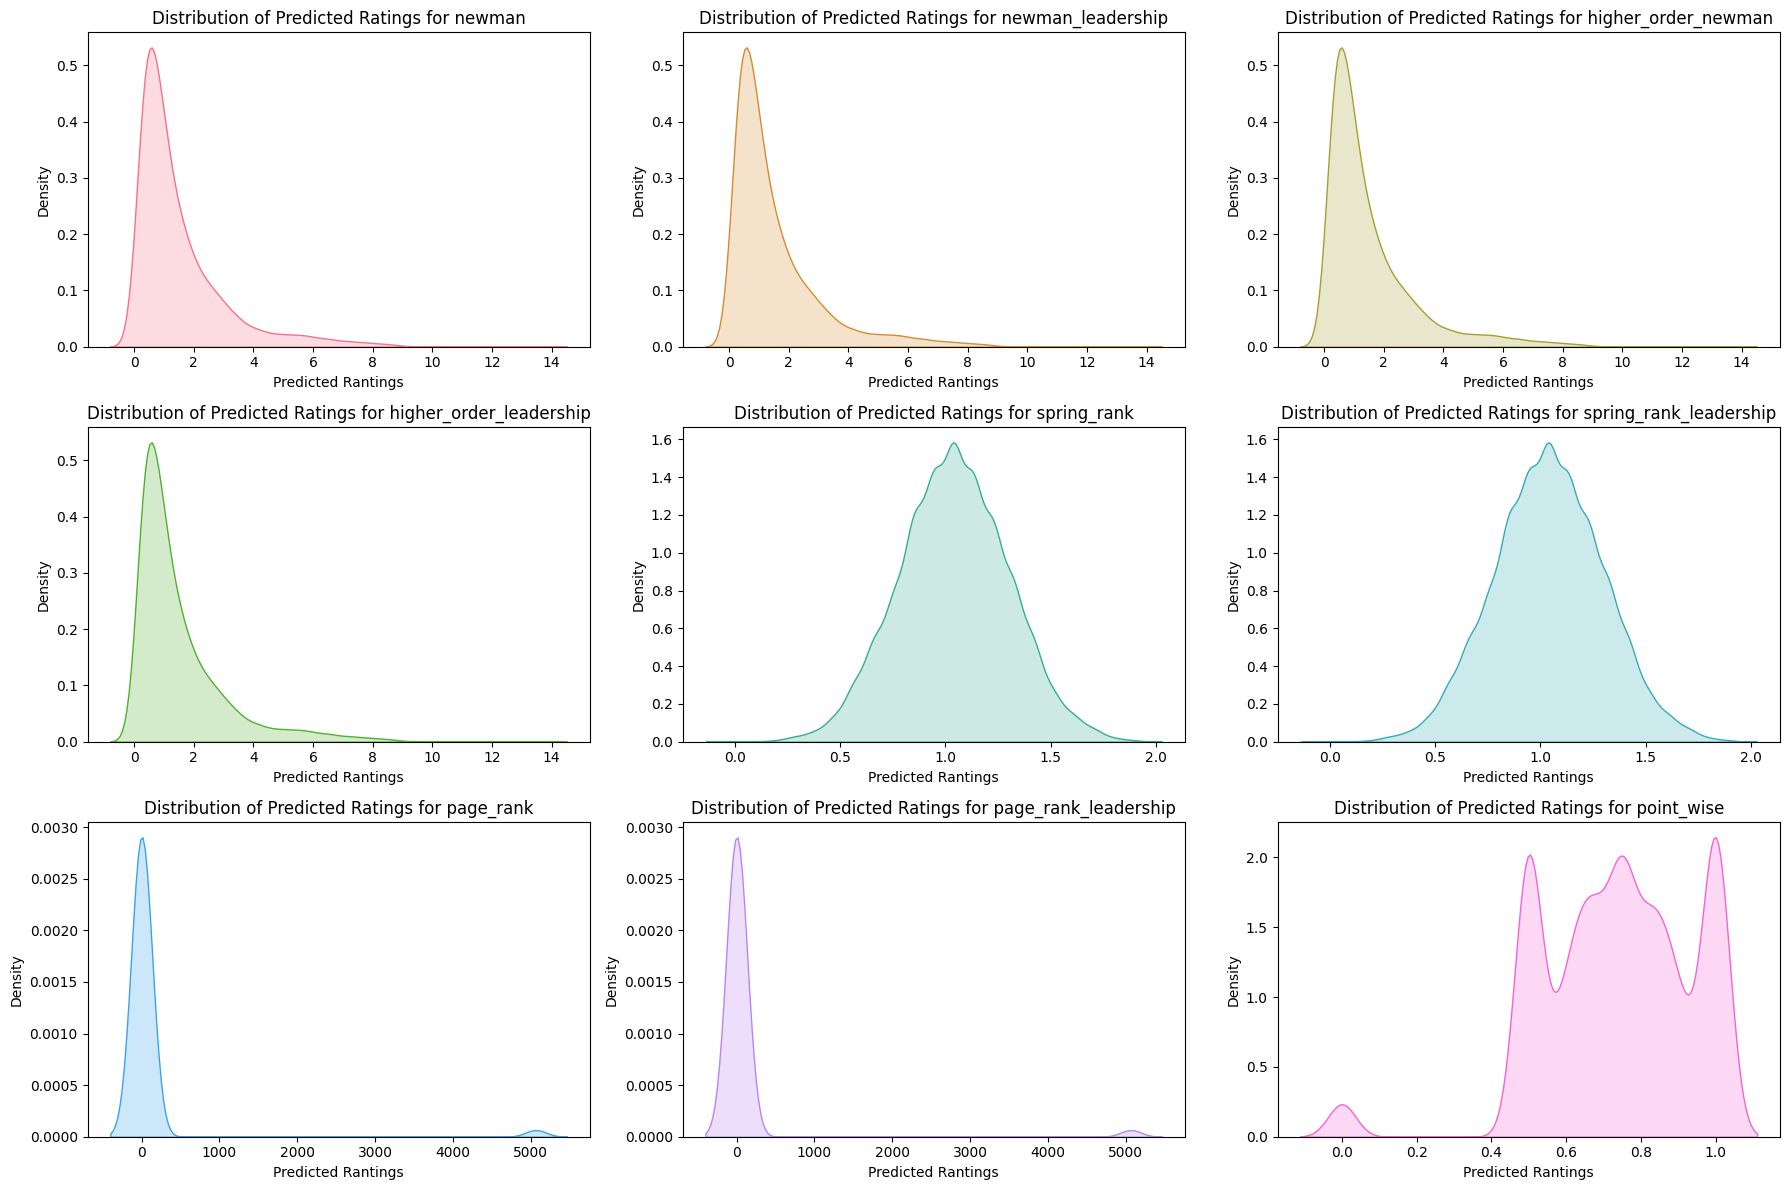

In [3]:
N, M, K1, K2 = 5000, 10000, 2, 2
predictions = get_distributions(N,M,K1,K2)
print(predictions)
plot_distributions(predictions)

### Luxes Axiom

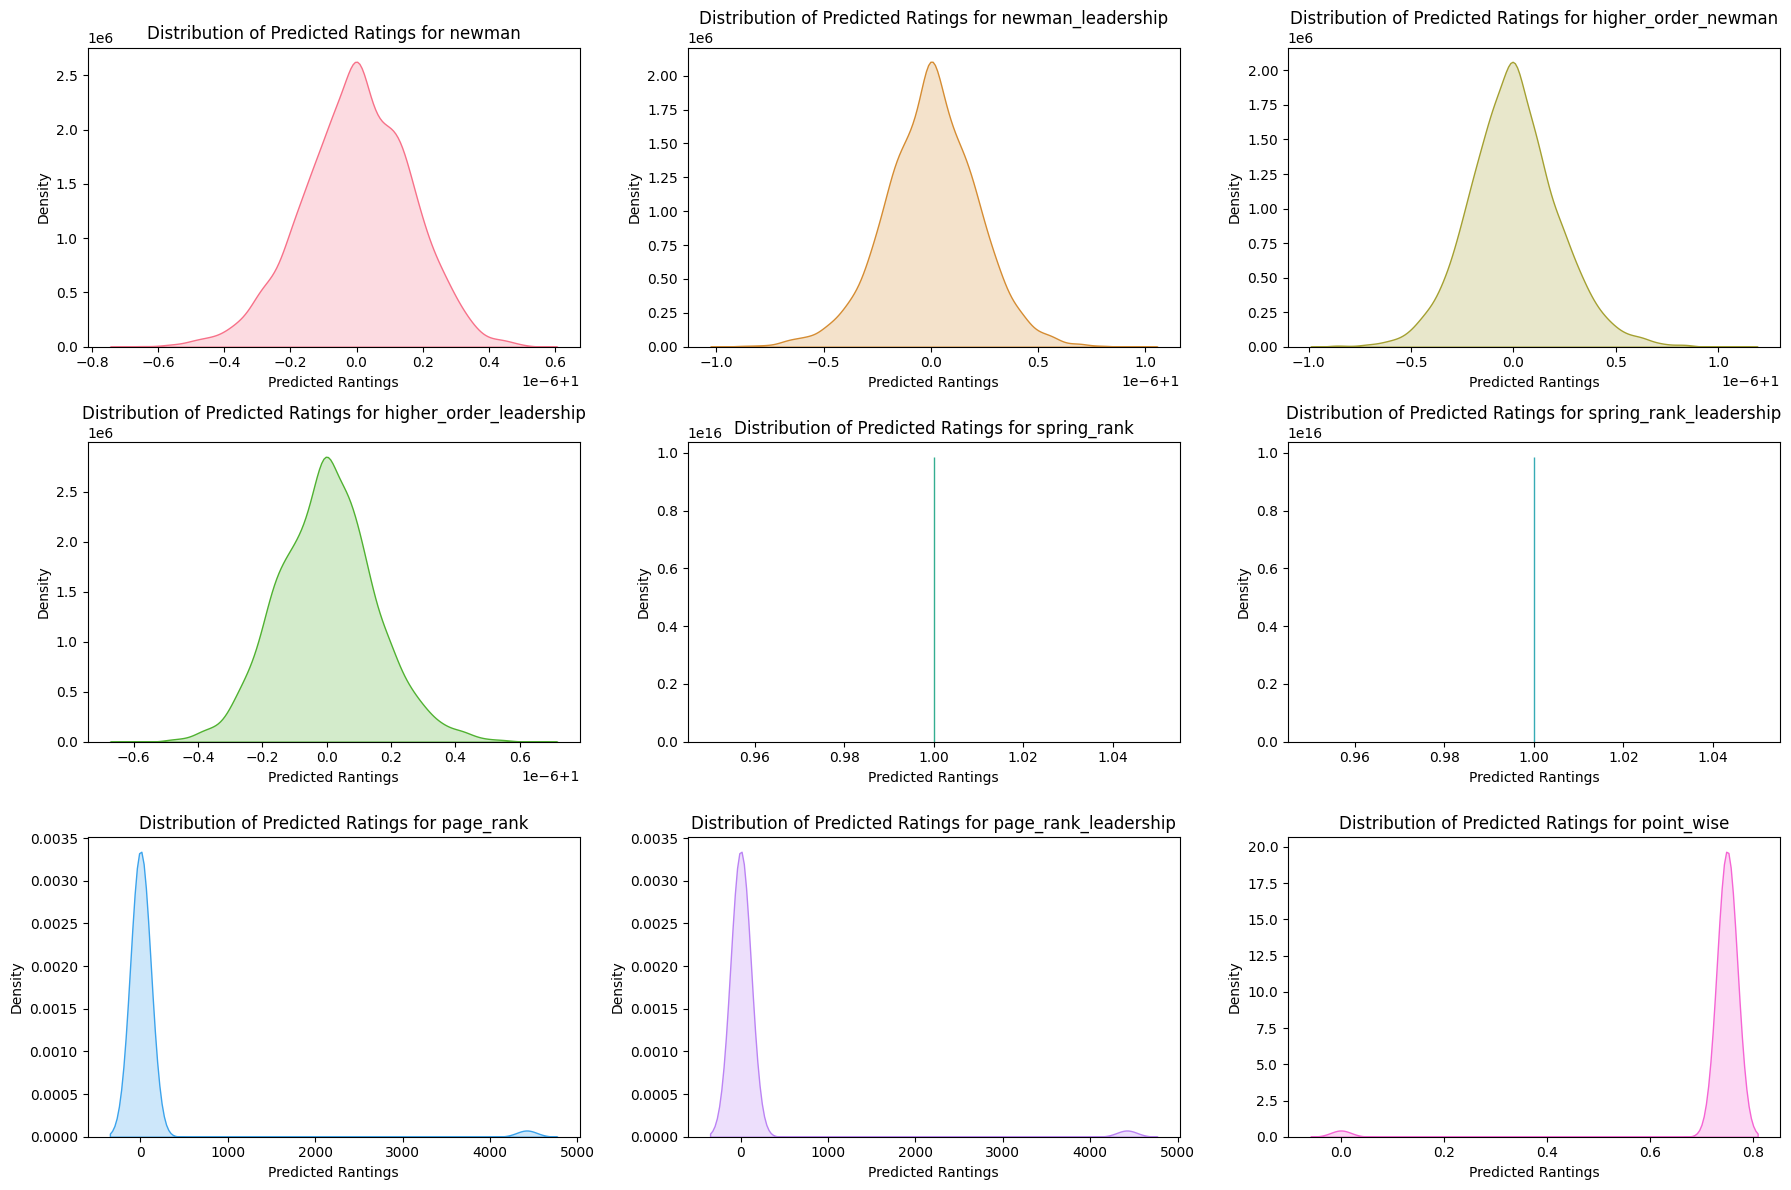

In [4]:
N, M, K1, K2 = 5000, 10000, 2, 2
predictions = get_distributions_luxe_axiom(N,M,K1,K2)
plot_distributions(predictions)


# Higher Order

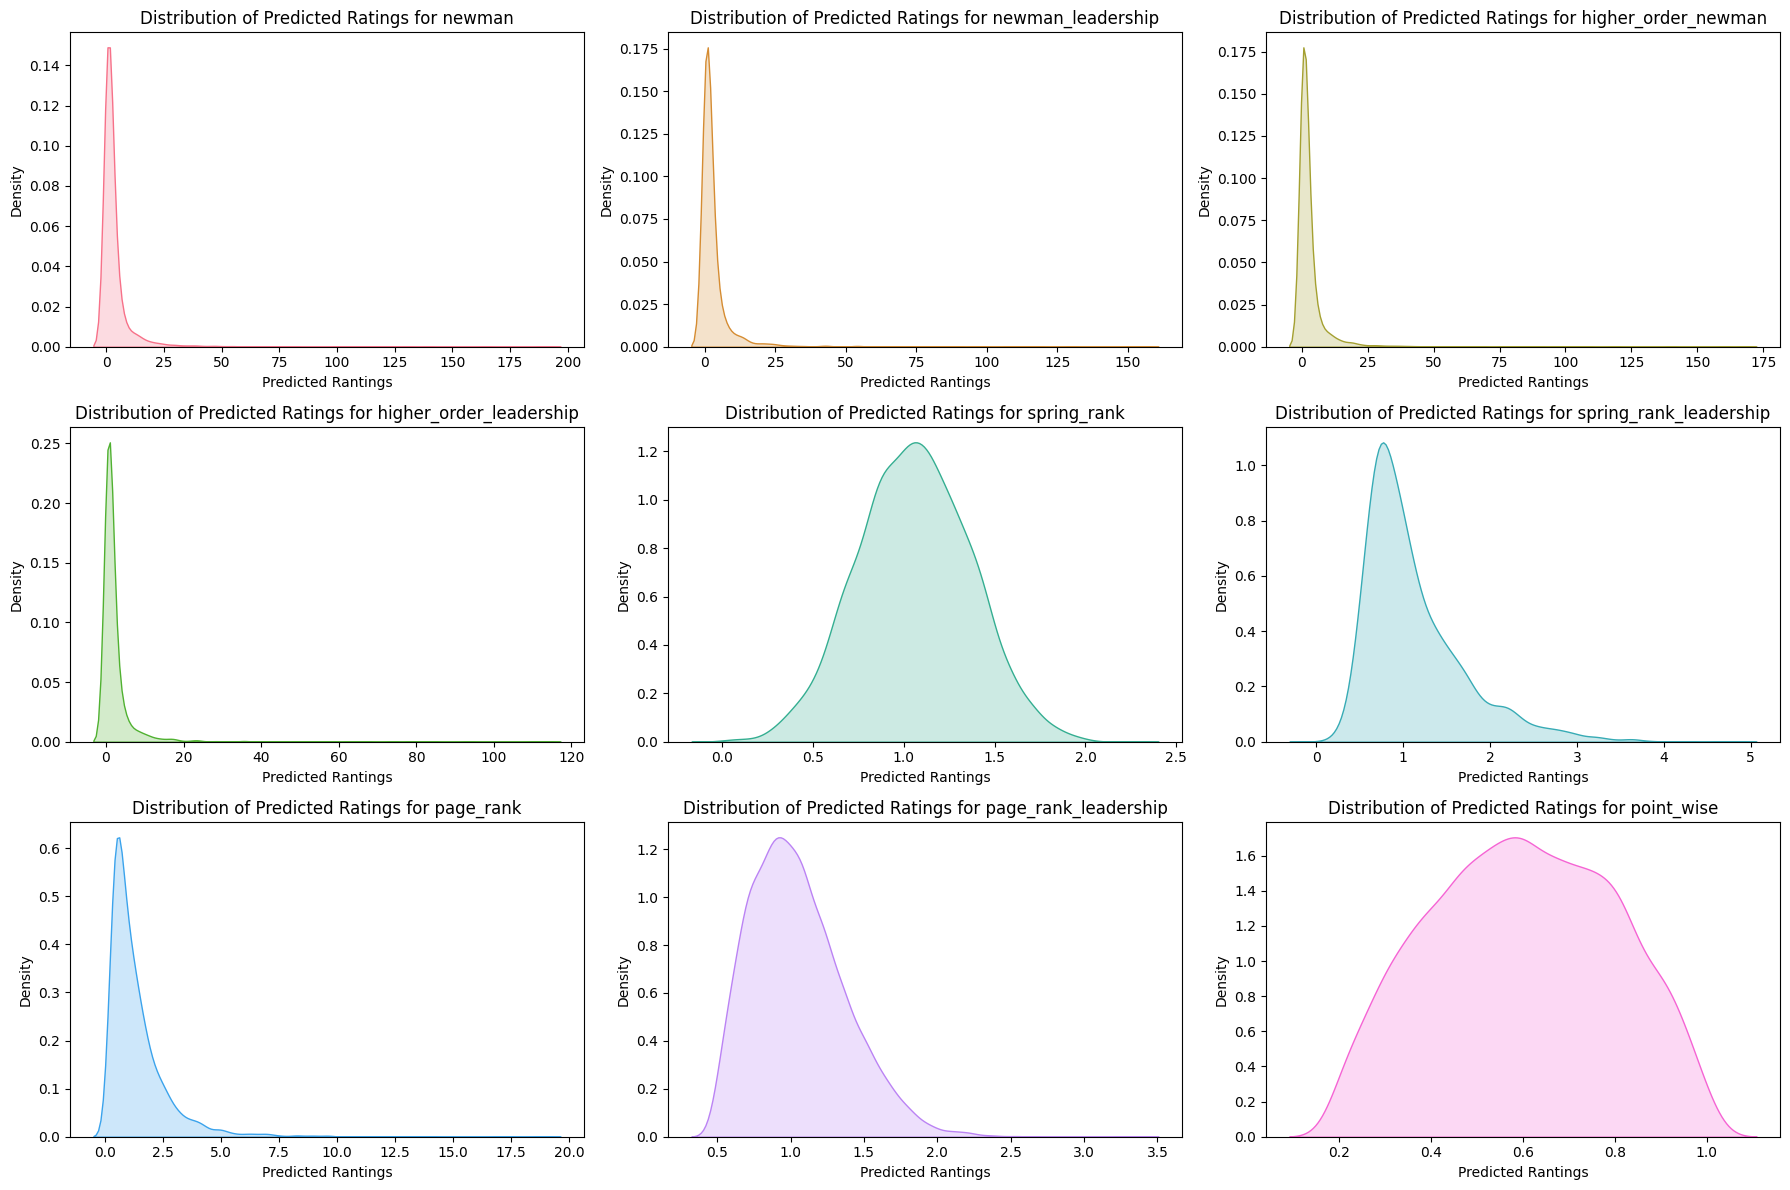

In [5]:
N, M, K1, K2 = 5000, 10000, 5, 5
predictions = get_distributions(N,M,K1,K2)
plot_distributions(predictions)

### Luxes Axiom

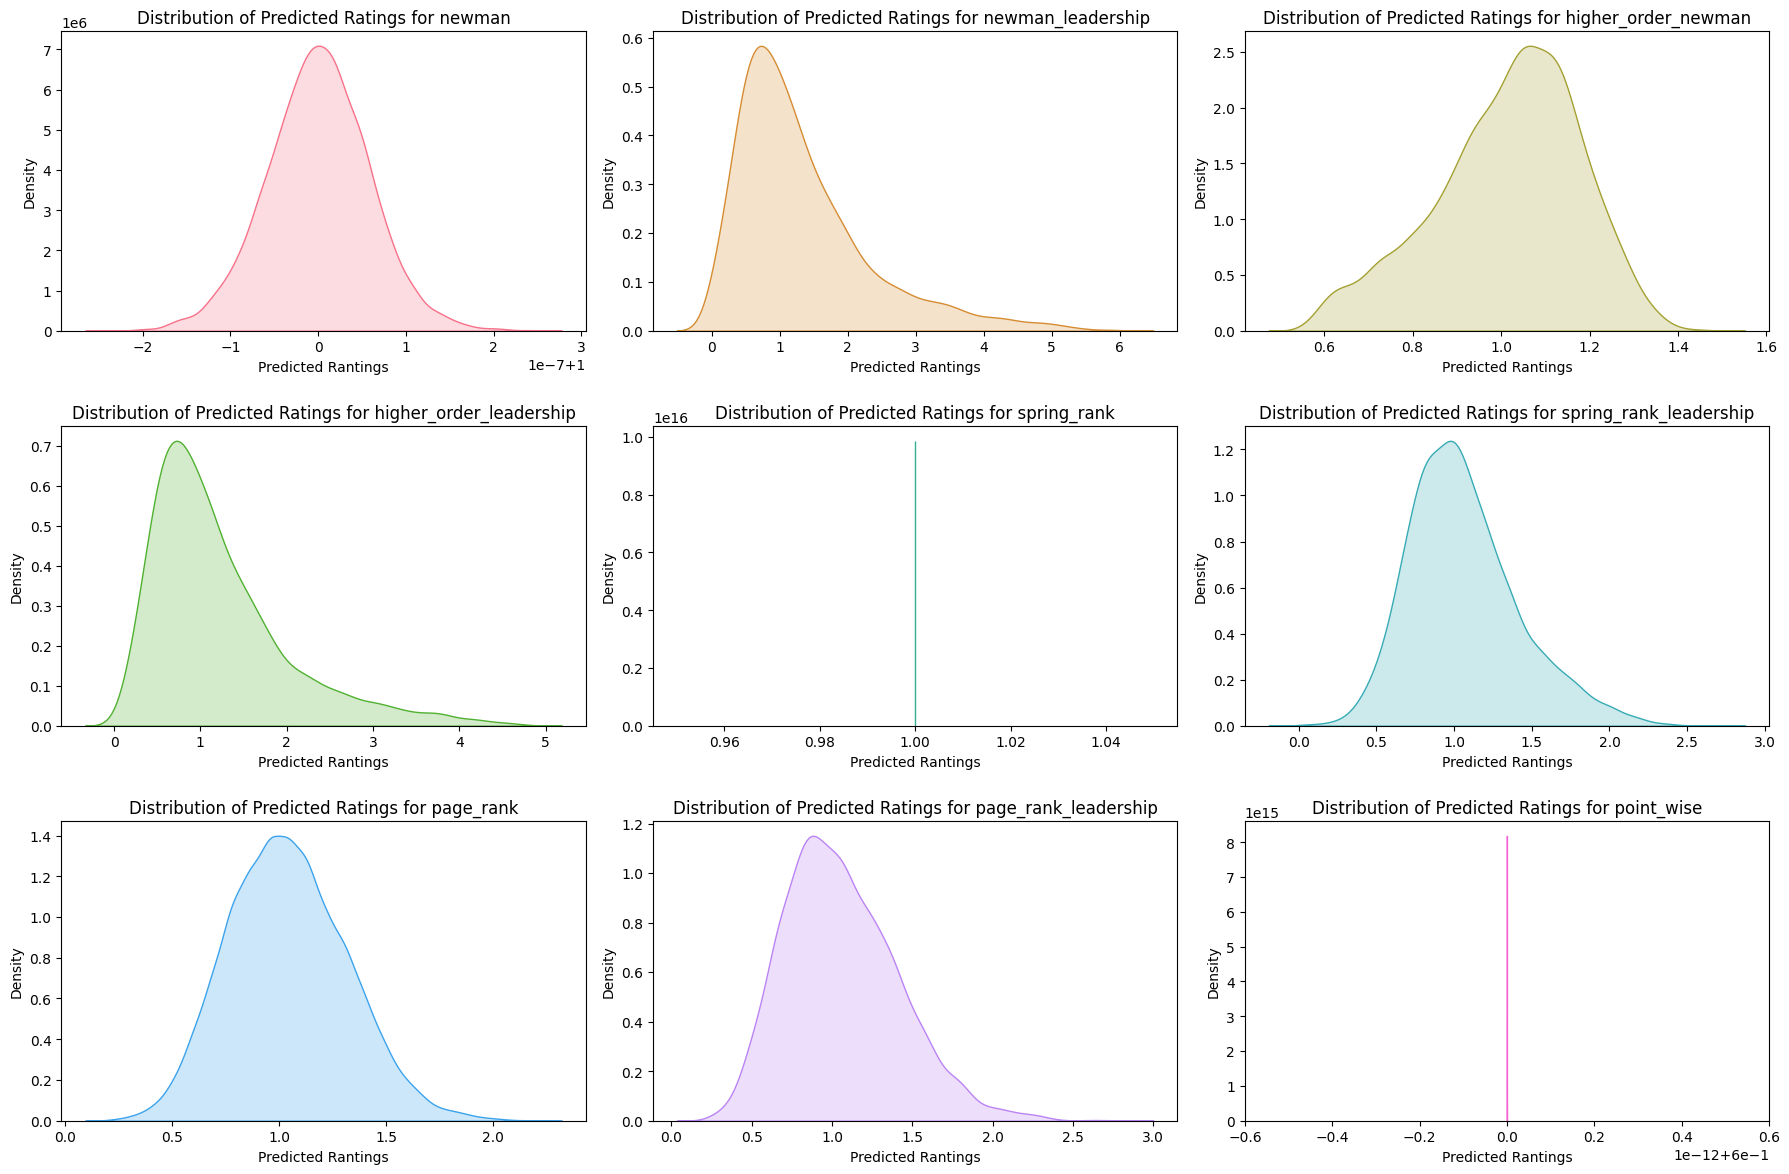

In [6]:
N, M, K1, K2 = 5000, 10000, 5, 5
predictions = get_distributions_luxe_axiom(N,M,K1,K2)
plot_distributions(predictions)

# Higher Order Leadership

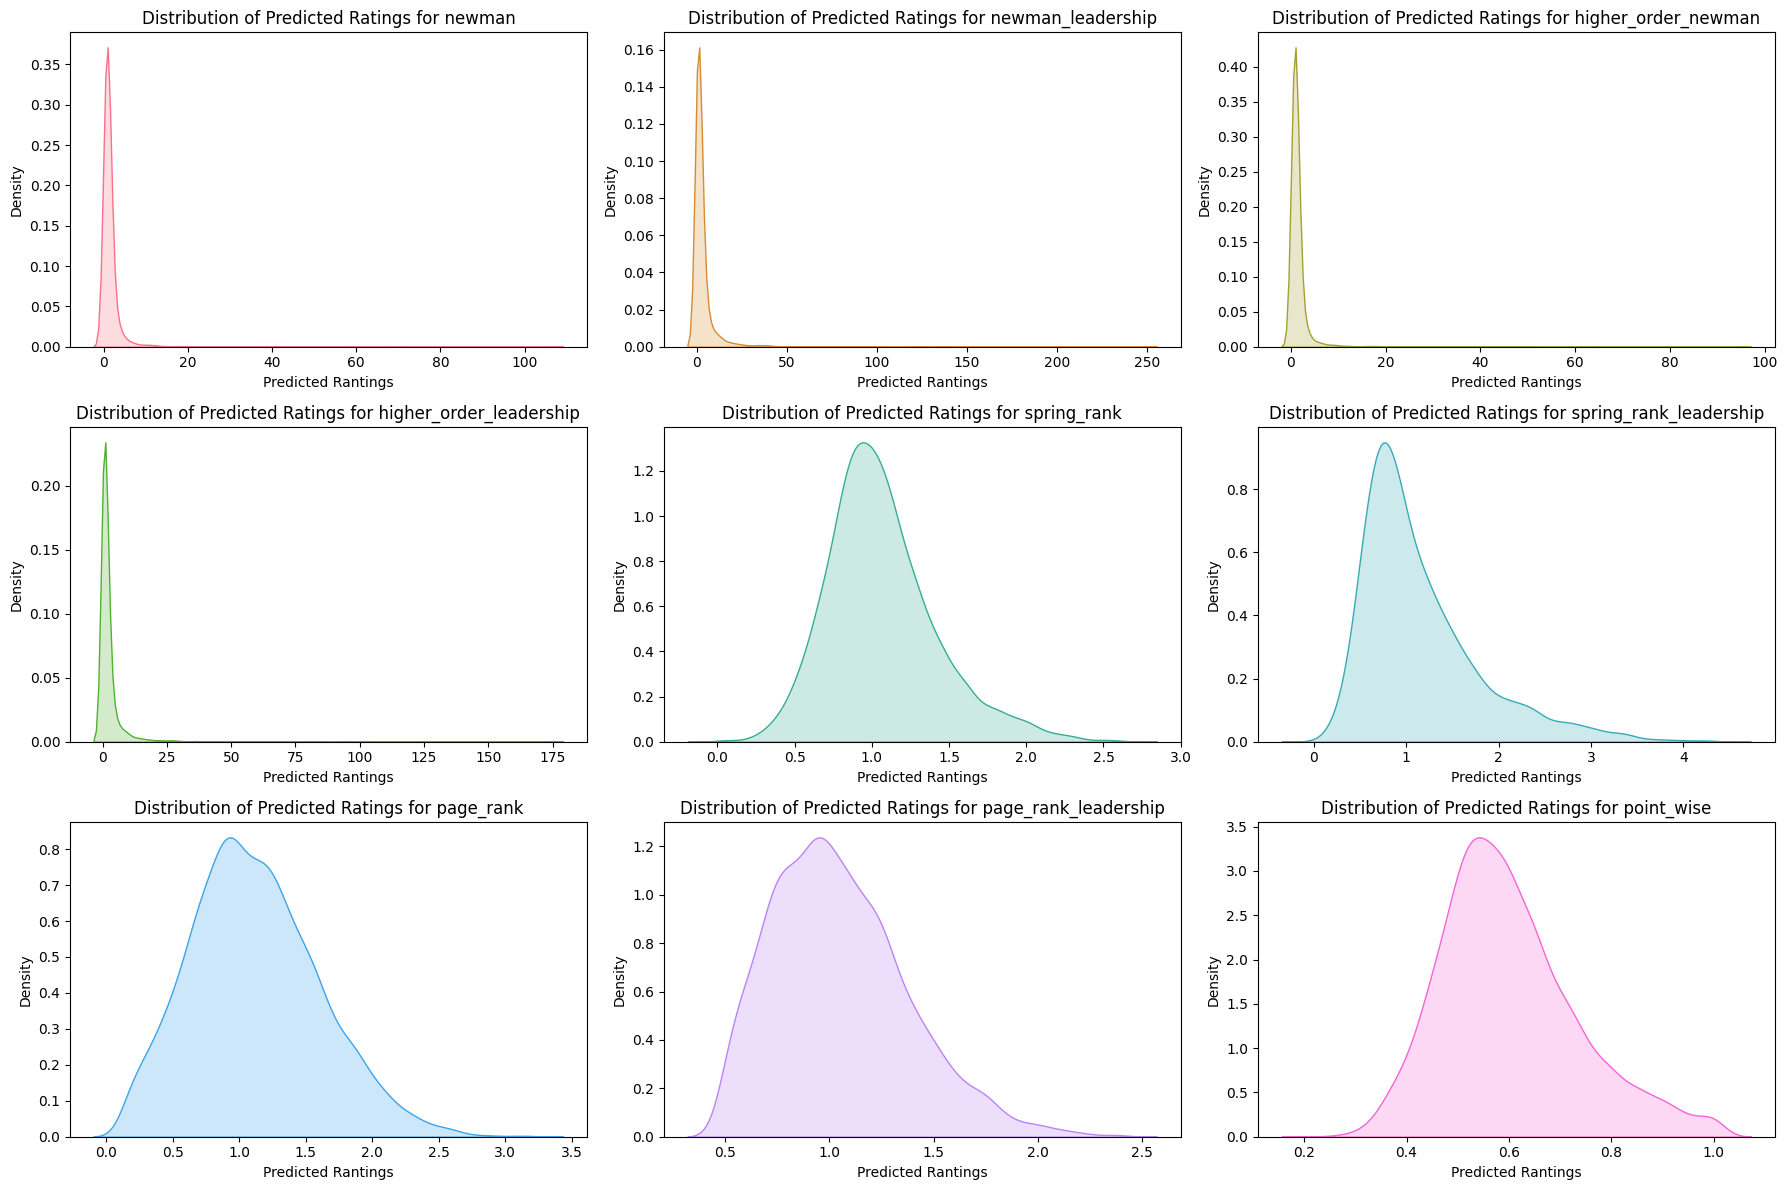

In [7]:
N, M, K1, K2 = 5000, 10000, 5, 5
predictions = get_distributions(N,M,K1,K2, leadership=True)
plot_distributions(predictions)

### luxes Axiom

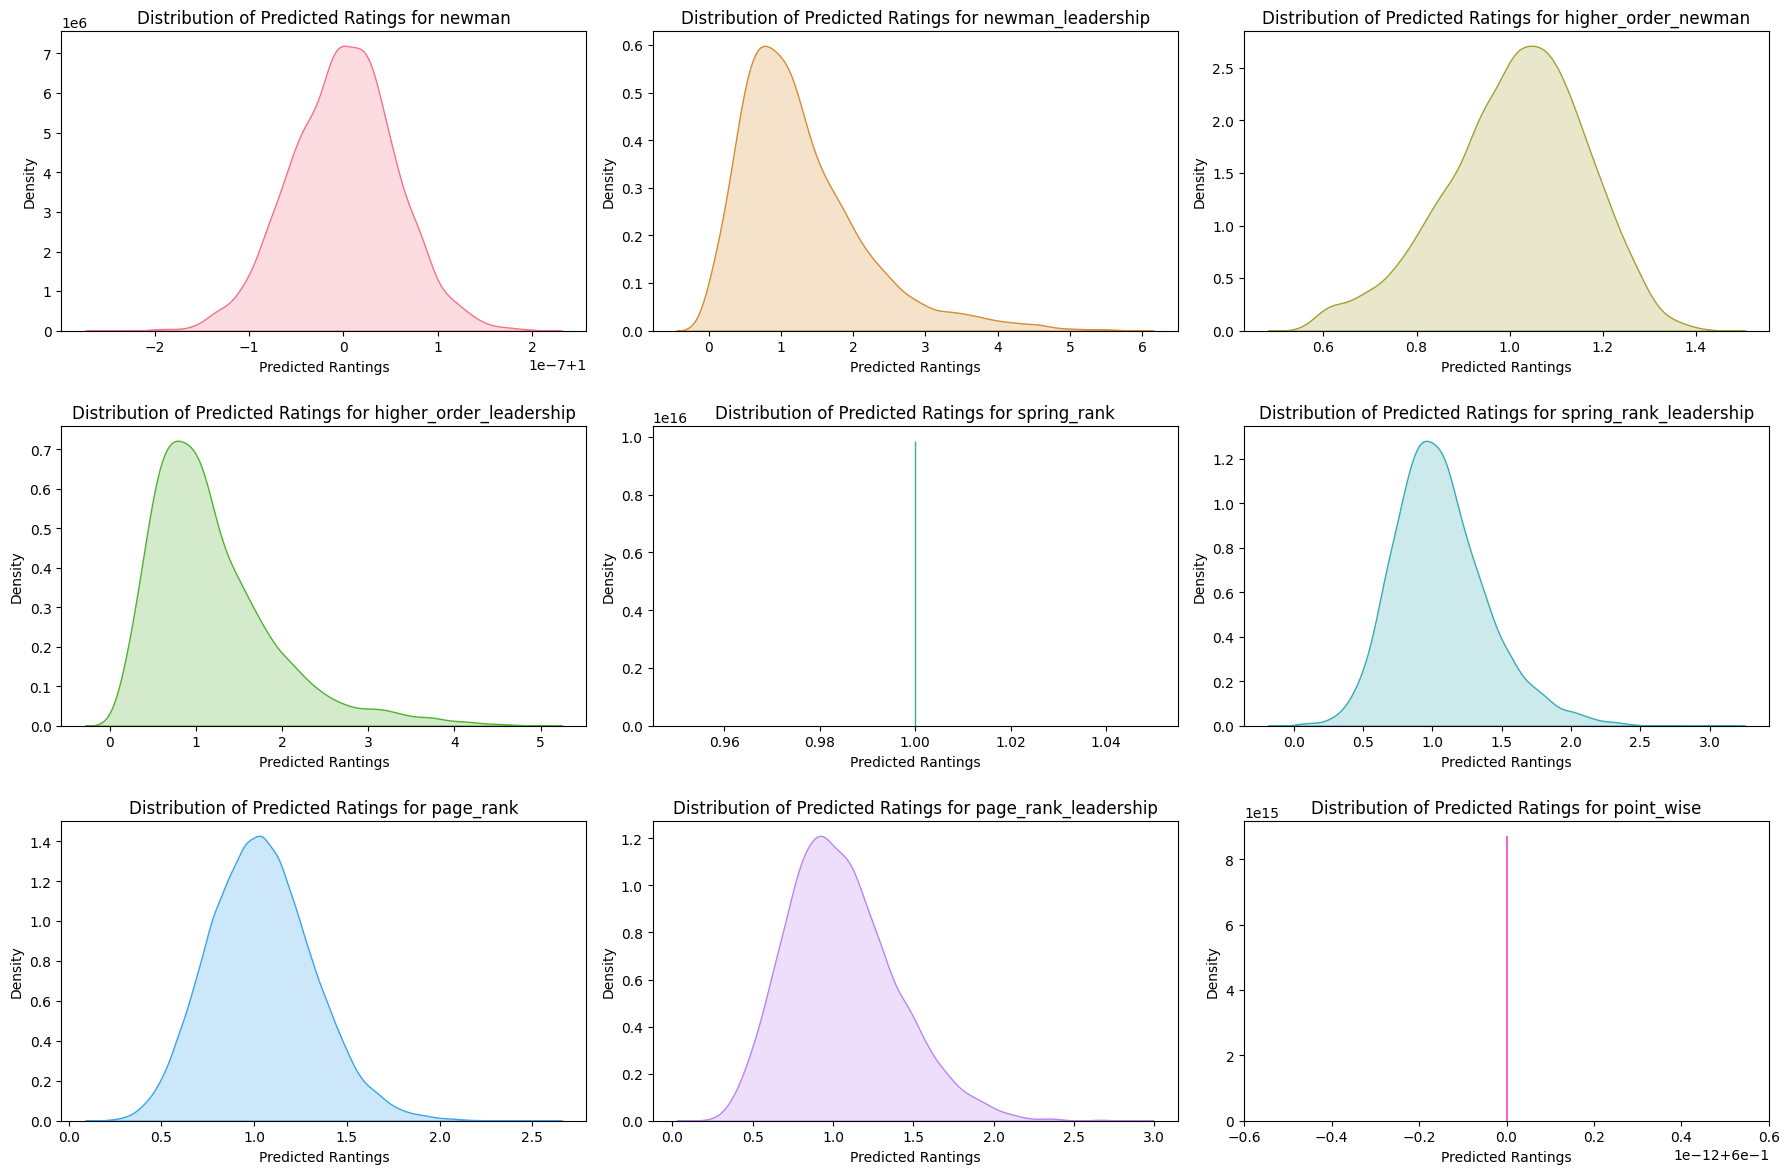

In [8]:
N, M, K1, K2 = 5000, 10000, 5, 5
predictions = get_distributions_luxe_axiom(N,M,K1,K2, leadership=True)
plot_distributions(predictions)